In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# PH01-00

In [4]:
df = pd.read_excel('ph0100(2).xlsx')

In [5]:
def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

In [6]:
# calculate correlation
df[np.array(df.columns)].corr()

C:\Users\gandh\AppData\Local\Temp\ipykernel_15632\2802010345.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[np.array(df.columns)].corr()


,Unnamed: 0,entry_id,flowrate_device,total flow,Pressure Ground Truth,pressure voltage,Pressure,Time_diff,Flowrate,Unnamed: 10,2.649414667
Unnamed: 0,1.000000e+00,1.000000e+00,-0.021197,0.997998,-0.003079,-0.003087,-0.006232,-0.035413,-0.021183,NaN,-6.158508e-17
entry_id,1.000000e+00,1.000000e+00,-0.021197,0.997998,-0.003079,-0.003087,-0.006232,-0.035413,-0.021183,NaN,-6.158508e-17
flowrate_device,-2.119714e-02,-2.119714e-02,1.000000,-0.018394,0.968607,0.956084,0.961346,-0.003352,0.992568,NaN,NaN
total flow,9.979982e-01,9.979982e-01,-0.018394,1.000000,-0.001313,-0.001376,-0.004242,-0.035595,-0.018346,NaN,NaN
Pressure Ground Truth,-3.078895e-03,-3.078895e-03,0.968607,-0.001313,1.000000,0.986366,0.988425,-0.004794,0.967103,NaN,5.000000e-01
pressure voltage,-3.087161e-03,-3.087161e-03,0.956084,-0.001376,0.986366,1.000000,0.979559,-0.005294,0.954461,NaN,5.618790e-01
Pressure,-6.232003e-03,-6.232003e-03,0.961346,-0.004242,0.988425,0.979559,1.000000,-0.001957,0.964155,NaN,NaN
Time_diff,-3.541348e-02,-3.541348e-02,-0.003352,-0.035595,-0.004794,-0.005294,-0.001957,1.000000,-0.002961,NaN,8.703878e-01
Flowrate,-2.118336e-02,-2.118336e-02,0.992568,-0.018346,0.967103,0.954461,0.964155,-0.002961,1.000000,NaN,NaN
Unnamed: 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Score:  0.9702490742560473
Error:  0.18630345969028944


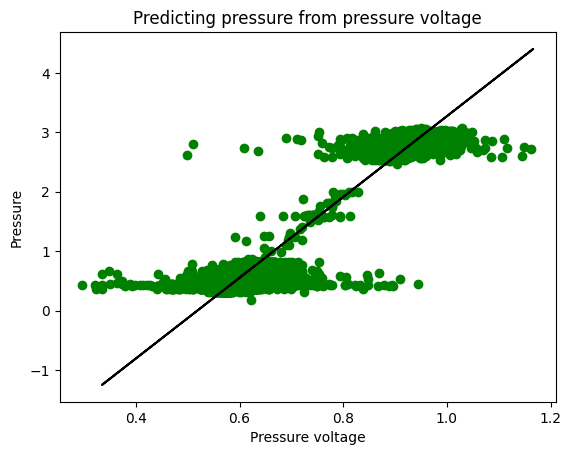

In [83]:
df_binary = df[['pressure', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['pressure']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()

Score:  0.9709437972578431
Error:  0.1851992841595066


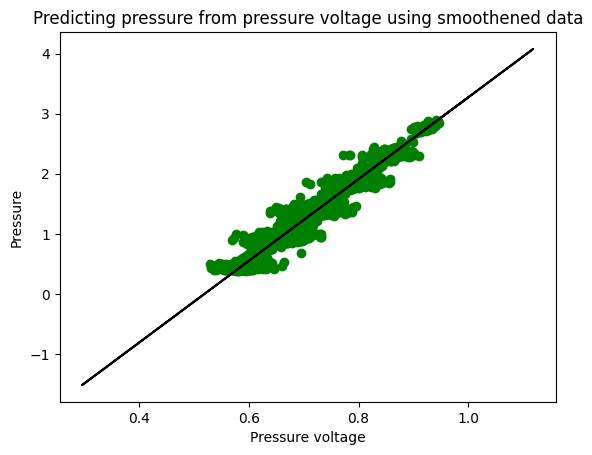

In [84]:
df_binary = df[['pressure', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)
  
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()

Score:  0.9809786066212047
Error:  0.1492733576281001


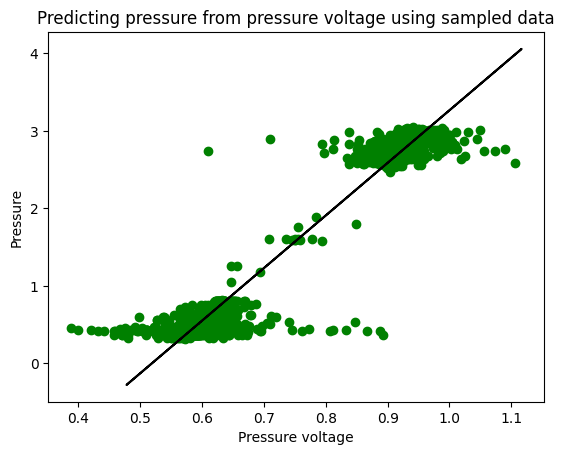

In [85]:
df_binary = df[['pressure voltage', 'pressure']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()


Score:  0.9776598515262944
Error:  0.1620655063001738


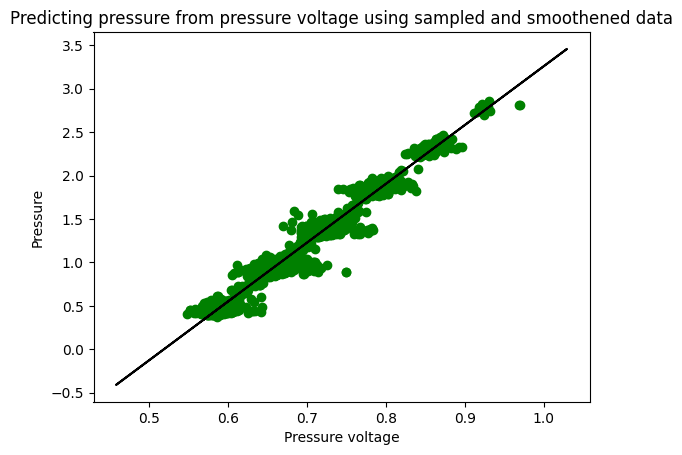

In [86]:
df_binary = df[['pressure voltage', 'pressure']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['pressure'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting pressure from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Pressure')
plt.show()


Score:  0.9075938884234505
Error:  1.1075704568378353


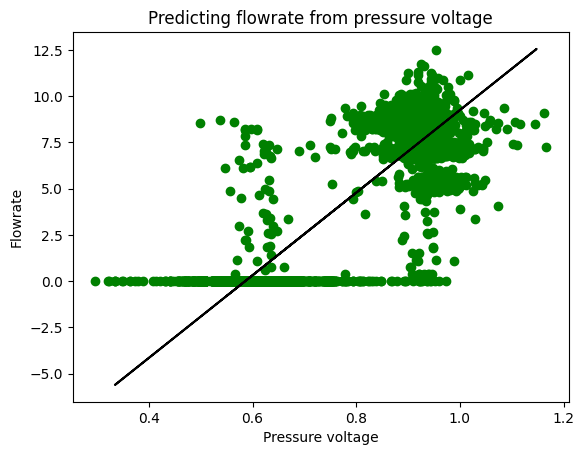

Input: pressure voltage
Predicted: flowrate


In [22]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
# plt.plot(y_train)
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9123693863023439
Error:  1.0821233689459333


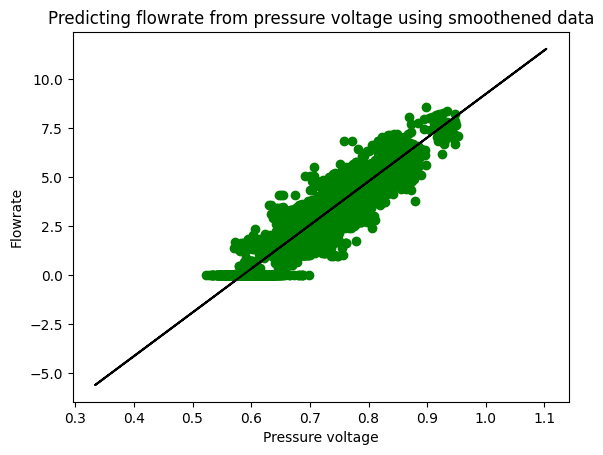

Input: pressure voltage
Predicted: flowrate


In [88]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
# since each dataframe contains only one column

df_binary.dropna(inplace = True)  
# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  
# Splitting the data into training and testing data

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9001655960864131
Error:  1.1606810656540683


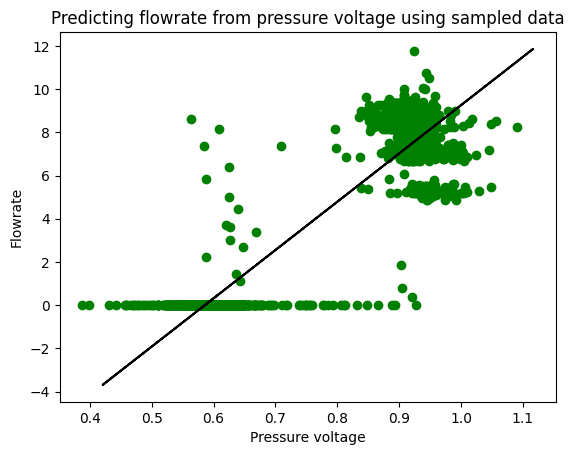

In [89]:
df_binary = df[['pressure voltage', 'flowrate_manual']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()


Score:  0.9234080524380511
Error:  0.9929874013386518


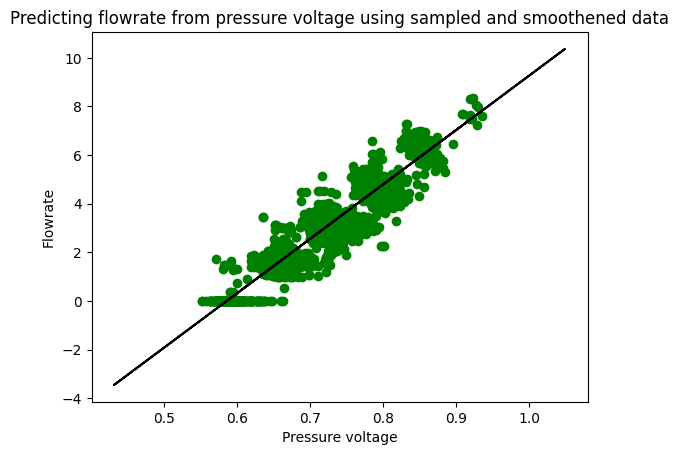

Input: sampled pressure voltage
Predicted: sampled flowrate


In [60]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
df_binary = df_binary.sample(frac=1)
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.9359237605983102
Error:  0.9224951702206797


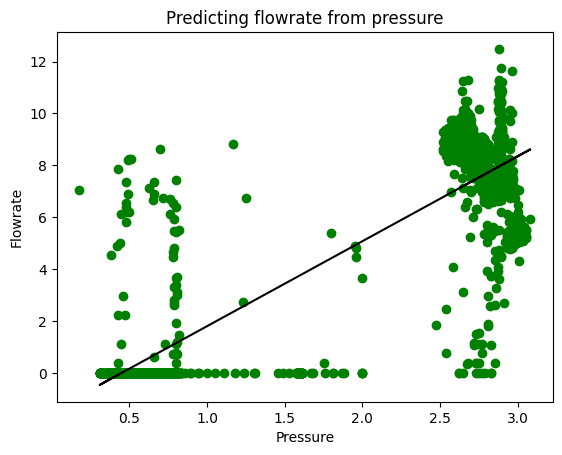

Input: pressure
Predicted: flowrate


In [29]:
df_binary = df[['flowrate_manual', 'pressure']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure")
print("Predicted: flowrate")

Score:  0.9344832503389853
Error:  0.9336644746073425


C:\Users\gandh\AppData\Local\Temp\ipykernel_16132\3208558916.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


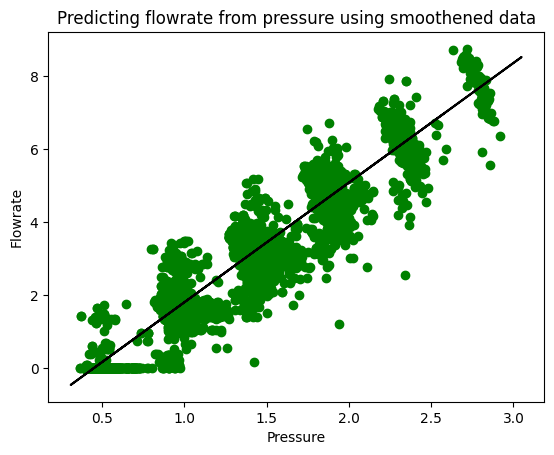

Input: smoothened pressure
Predicted: smoothened flowrate


In [92]:
df_binary = df[['flowrate_manual', 'pressure']]

X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure using smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()
print("Input: smoothened pressure")
print("Predicted: smoothened flowrate")

   flowrate_manual  pressure
0              0.0      0.63
1              0.0      0.63
2              0.0      0.62
3              0.0      0.62
4              0.0      0.62
    flowrate_manual  pressure
0               0.0      0.63
5               0.0      0.61
10              0.0      0.60
15              0.0      0.59
20              0.0      0.57
Score:  0.9331323336147007
Error:  0.9616471698792455


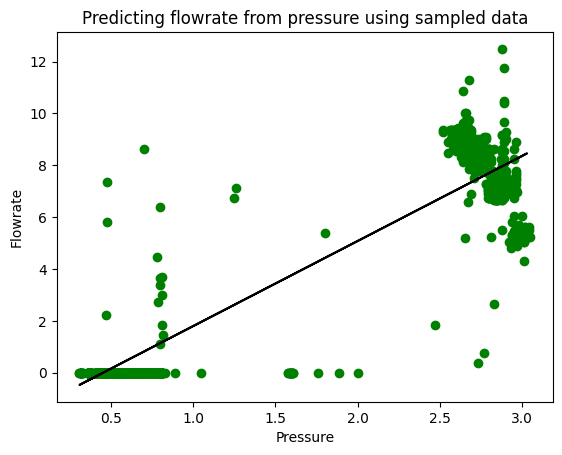

In [93]:
df_binary = df[['flowrate_manual', 'pressure']]
print(df_binary.head())
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
print(df_binary.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # Smooth X_train and y_train
# X_train = smooth(X_train, 5)
# y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure using sampled data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()


   flowrate_manual  pressure
0              0.0      0.63
1              0.0      0.63
2              0.0      0.62
3              0.0      0.62
4              0.0      0.62
    flowrate_manual  pressure
0               0.0      0.63
5               0.0      0.61
10              0.0      0.60
15              0.0      0.59
20              0.0      0.57
Score:  0.939066175391112
Error:  0.8909901022807014


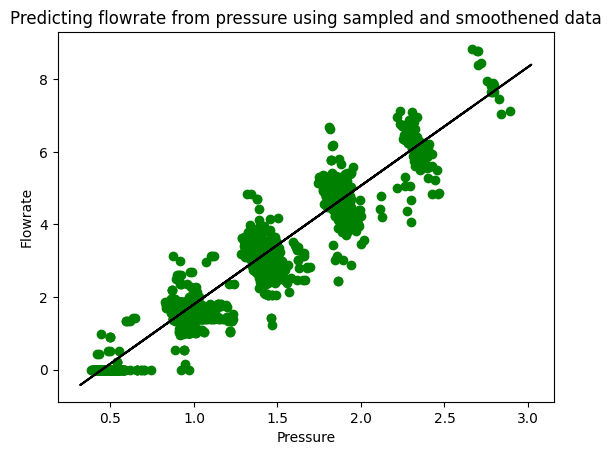

In [31]:
df_binary = df[['flowrate_manual', 'pressure']]
print(df_binary.head())
#selecting every 5th row
df_binary = df_binary.iloc[::5, :]
print(df_binary.head())
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure'])
y = np.array(df_binary['flowrate_manual'])

# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure using sampled and smoothened data')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()


# PH03-02

In [33]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0302(2).xlsx')

Score:  0.7754563626872938
Error:  0.9393335028682808


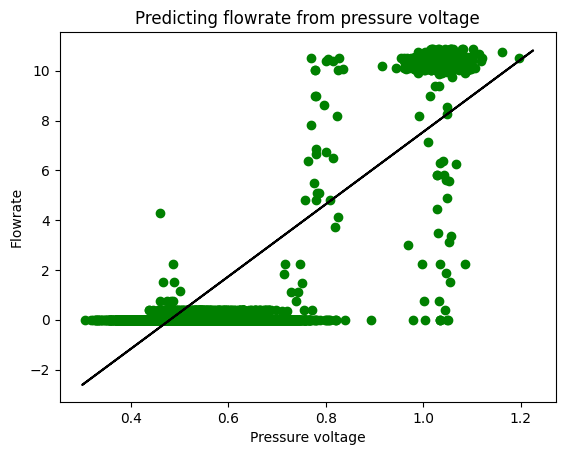

Input: pressure voltage
Predicted: flowrate


In [108]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate') 
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.7683960271840042
Error:  0.9318443122952679


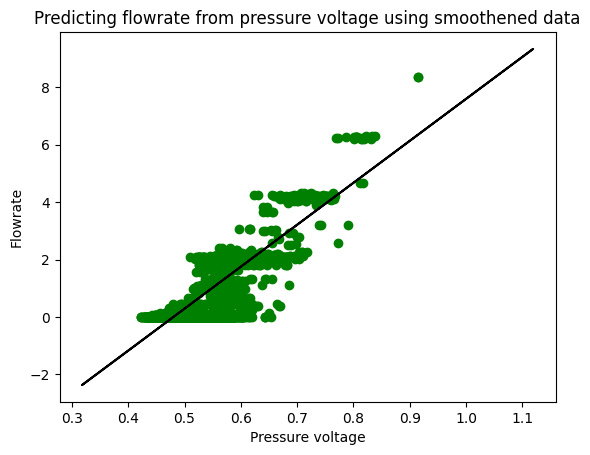

Input: pressure voltage
Predicted: flowrate


In [109]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.817332991241973
Error:  0.853964558215593


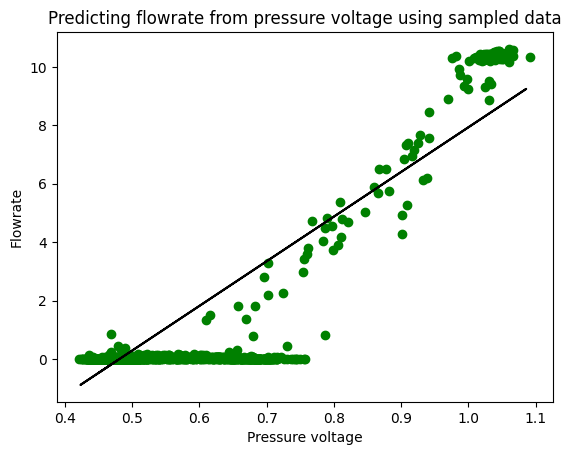

Input: sampled pressure voltage
Predicted: sampled flowrate


In [113]:
df_binary = df[['flowrate_manual', 'pressure voltage']]

# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.8528518681803712
Error:  0.8156159264750458


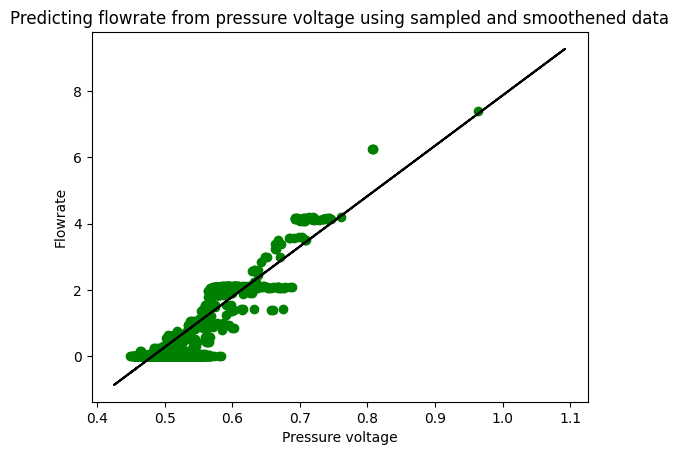

Input: sampled pressure voltage
Predicted: sampled flowrate


In [39]:
df_binary = df[['flowrate_manual', 'pressure voltage']]

# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

# PH03-03

In [40]:
# df = pd.read_csv('ph0100.xlsx')
#read the data from the excel file
df = pd.read_excel('ph0303(2).xlsx')

Score:  0.904371751184653
Error:  0.6606224373349396


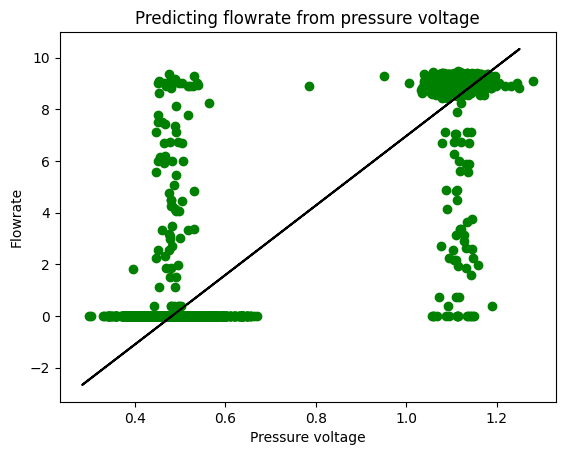

In [143]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate_manual']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting flowrate from pressure voltage')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate') 
plt.show()

Score:  0.9156341916281847
Error:  0.6433244591949359


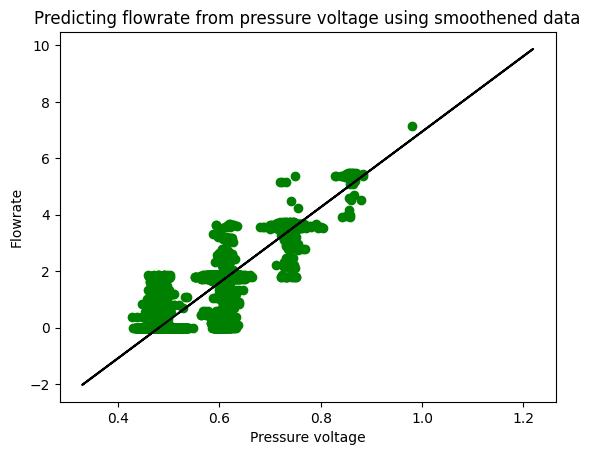

Input: pressure voltage
Predicted: flowrate


In [144]:
df_binary = df[['flowrate_manual', 'pressure voltage']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate_manual'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: pressure voltage")
print("Predicted: flowrate")

Score:  0.9869894825878716
Error:  0.2696977199931452


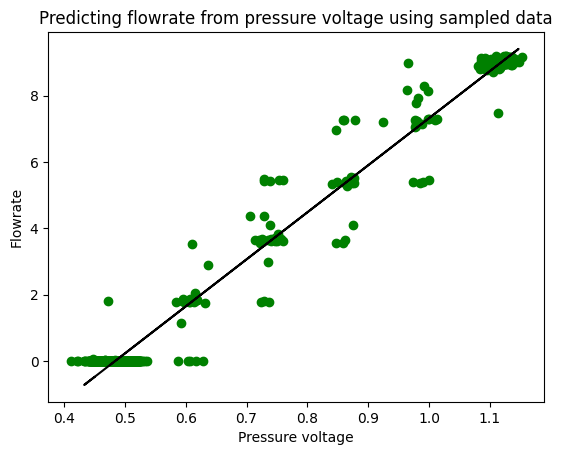

Input: sampled pressure voltage
Predicted: sampled flowrate


In [103]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage']).reshape(-1, 1)
y = np.array(df_binary['flowrate']).reshape(-1, 1)
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")

Score:  0.9879146285334325
Error:  0.24838883364832615


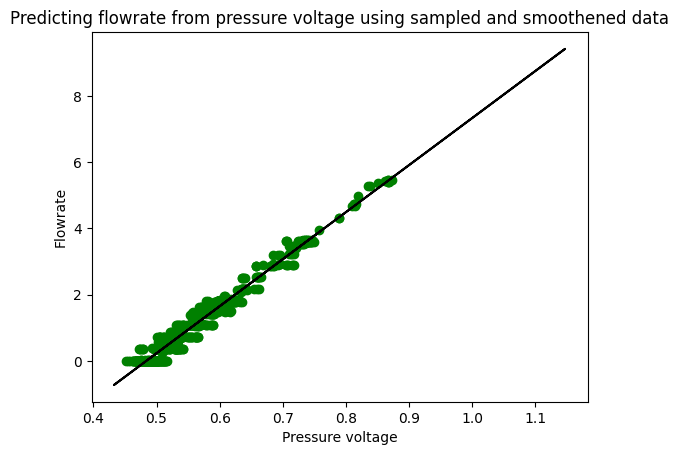

Input: sampled pressure voltage
Predicted: sampled flowrate


In [104]:
df_binary = df[['flowrate', 'pressure voltage']]
# taking mean of every 5 rows
df_binary = df_binary.groupby(np.arange(len(df_binary))//5).mean()
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['pressure voltage'])
y = np.array(df_binary['flowrate'])
  
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Smooth X_train and y_train
X_train = smooth(X_train, 5)
y_train = smooth(y_train, 5)

# # reshape X_train, y_train, X_test, y_test
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting flowrate from pressure voltage using sampled and smoothened data')
plt.xlabel('Pressure voltage')
plt.ylabel('Flowrate')
plt.show()
print("Input: sampled pressure voltage")
print("Predicted: sampled flowrate")